In [2]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
# Read CSV file.
df = pd.read_csv('Melbourne_housing.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Check the number of unique values from all columns in the dataframe
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
# remove column with high unique values
df = df.drop(['Suburb', 'Address', 'SellerG'], axis=1)
df.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,3,u,NaN,VB,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [63]:
# Extract year from 'Date' column
df['Date'] = df['Date'].str[-4:]
df.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Segment
6,4,h,1600000.0,VB,2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Other,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,Other
24,3,h,1350000.0,VB,2016,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,2005.0,Other,-37.8085,144.9964,Northern Metropolitan,4019.0,2016,Other
25,2,u,750000.0,S,2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Other,-37.8078,144.9965,Northern Metropolitan,4019.0,2016,Other
43,2,h,1100000.0,PI,2016,2.5,3067.0,2.0,2.0,1.0,124.0,135.0,2013.0,Other,-37.8079,144.9977,Northern Metropolitan,4019.0,2016,Other
49,3,h,1447500.0,PI,2016,2.5,3067.0,3.0,3.0,1.0,166.0,174.0,2012.0,Other,-37.8017,145.0001,Northern Metropolitan,4019.0,2016,Other


In [72]:
# Convert 'Date' column to integer
df['Date'] = df['Date'].astype(int)
df.head()


,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Segment
6,4,h,1600000.0,VB,2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Other,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,Other
24,3,h,1350000.0,VB,2016,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,2005.0,Other,-37.8085,144.9964,Northern Metropolitan,4019.0,2016,Other
25,2,u,750000.0,S,2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Other,-37.8078,144.9965,Northern Metropolitan,4019.0,2016,Other
43,2,h,1100000.0,PI,2016,2.5,3067.0,2.0,2.0,1.0,124.0,135.0,2013.0,Other,-37.8079,144.9977,Northern Metropolitan,4019.0,2016,Other
49,3,h,1447500.0,PI,2016,2.5,3067.0,3.0,3.0,1.0,166.0,174.0,2012.0,Other,-37.8017,145.0001,Northern Metropolitan,4019.0,2016,Other


In [81]:
df['CouncilArea'].unique()

array(['Other'], dtype=object)

In [115]:
# Seperate council areas by Inner, Outer, middle and other melbourne

def segment_council_area(area):
    if area in ['Yarra', 'Port Phillip', 'Stonnington', 'Boroondara']:
        return 'Inner Melbourne'
    elif area in ['Hobsons Bay', 'Darebin', 'Hume', 'Kingston', 'Maribyrnong', 'Monash', 'Whitehorse']:
        return 'Outer Melbourne'
    elif area in ['Moreland', 'Banyule', 'Bayside', 'Brimbank', 'Melbourne', 'Hume', 'Kingston', 'Monash', 'Port Phillip', 'Stonnington', 'Yarra']:
        return 'Middle Melbourne'
    else:
        return 'Other Melbourne'

# Apply the function to the CouncilArea column
df['Segment'] = df['CouncilArea'].apply(segment_council_area)


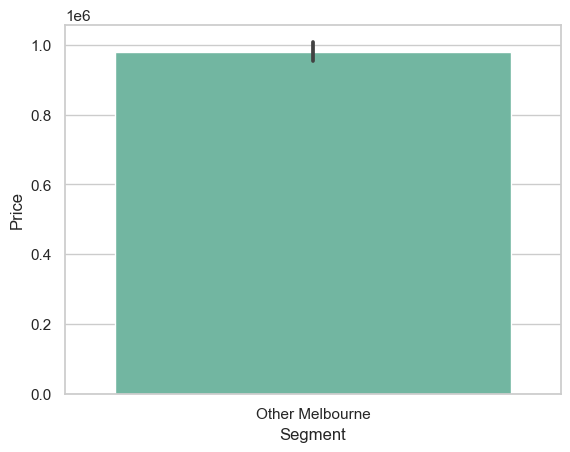

In [116]:
sns.barplot(x='Segment', y='Price', data=df)
plt.show()

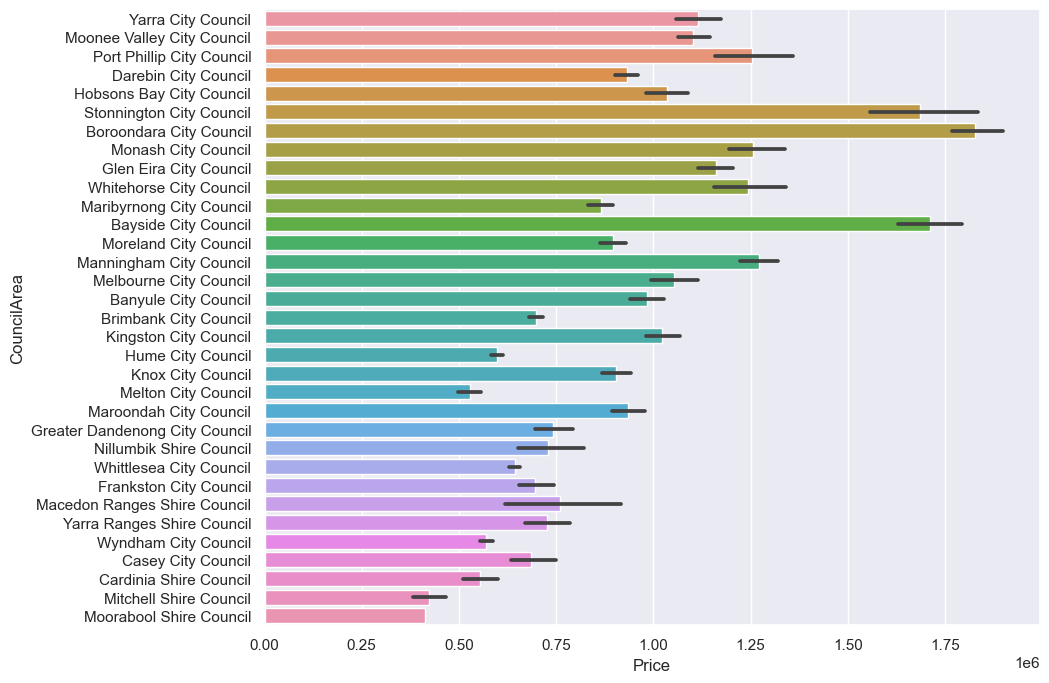

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Price', y='CouncilArea', data=df)
plt.show()


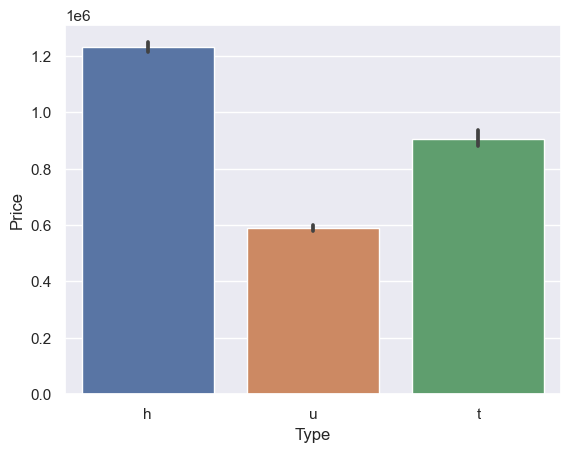

In [13]:
# barplot based on type of property and price
sns.barplot(x='Type', y='Price', data=df)
plt.show()

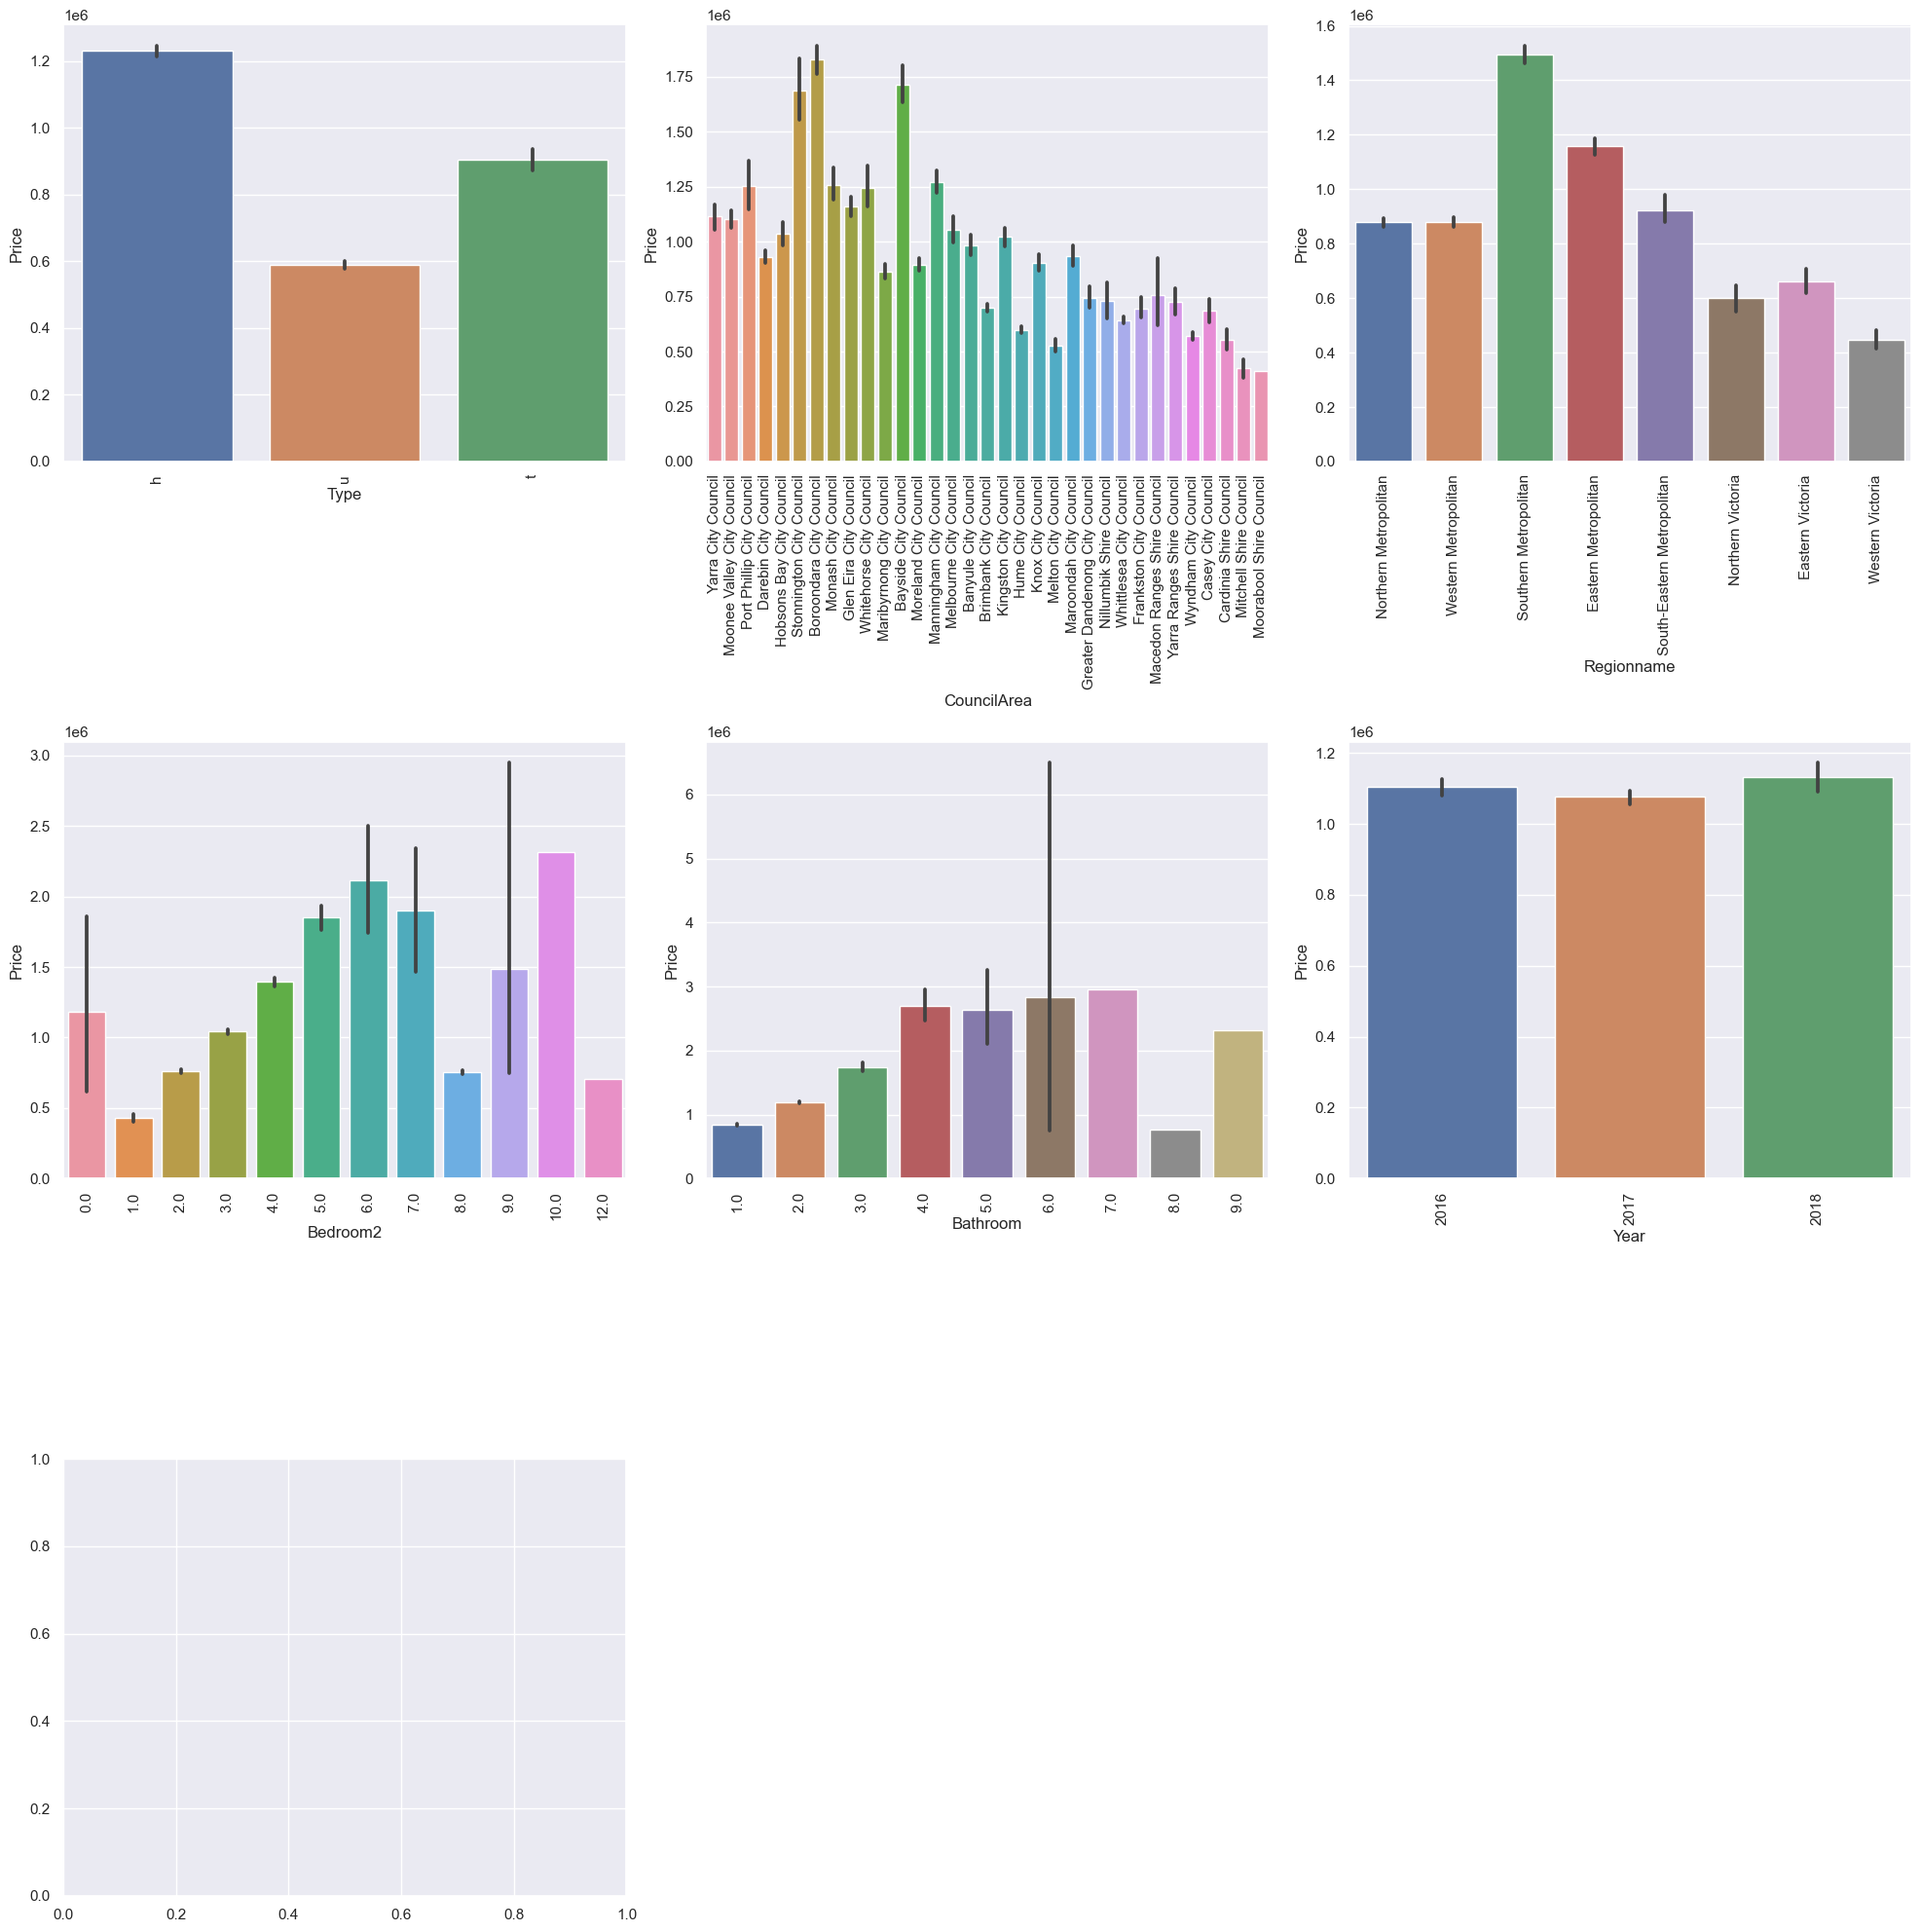

In [32]:
# list of categorical variables to plot
cat_vars = ['Type', 'CouncilArea', 'Regionname', 'Bedroom2', 'Bathroom', 'Year']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

# show plot
plt.show()

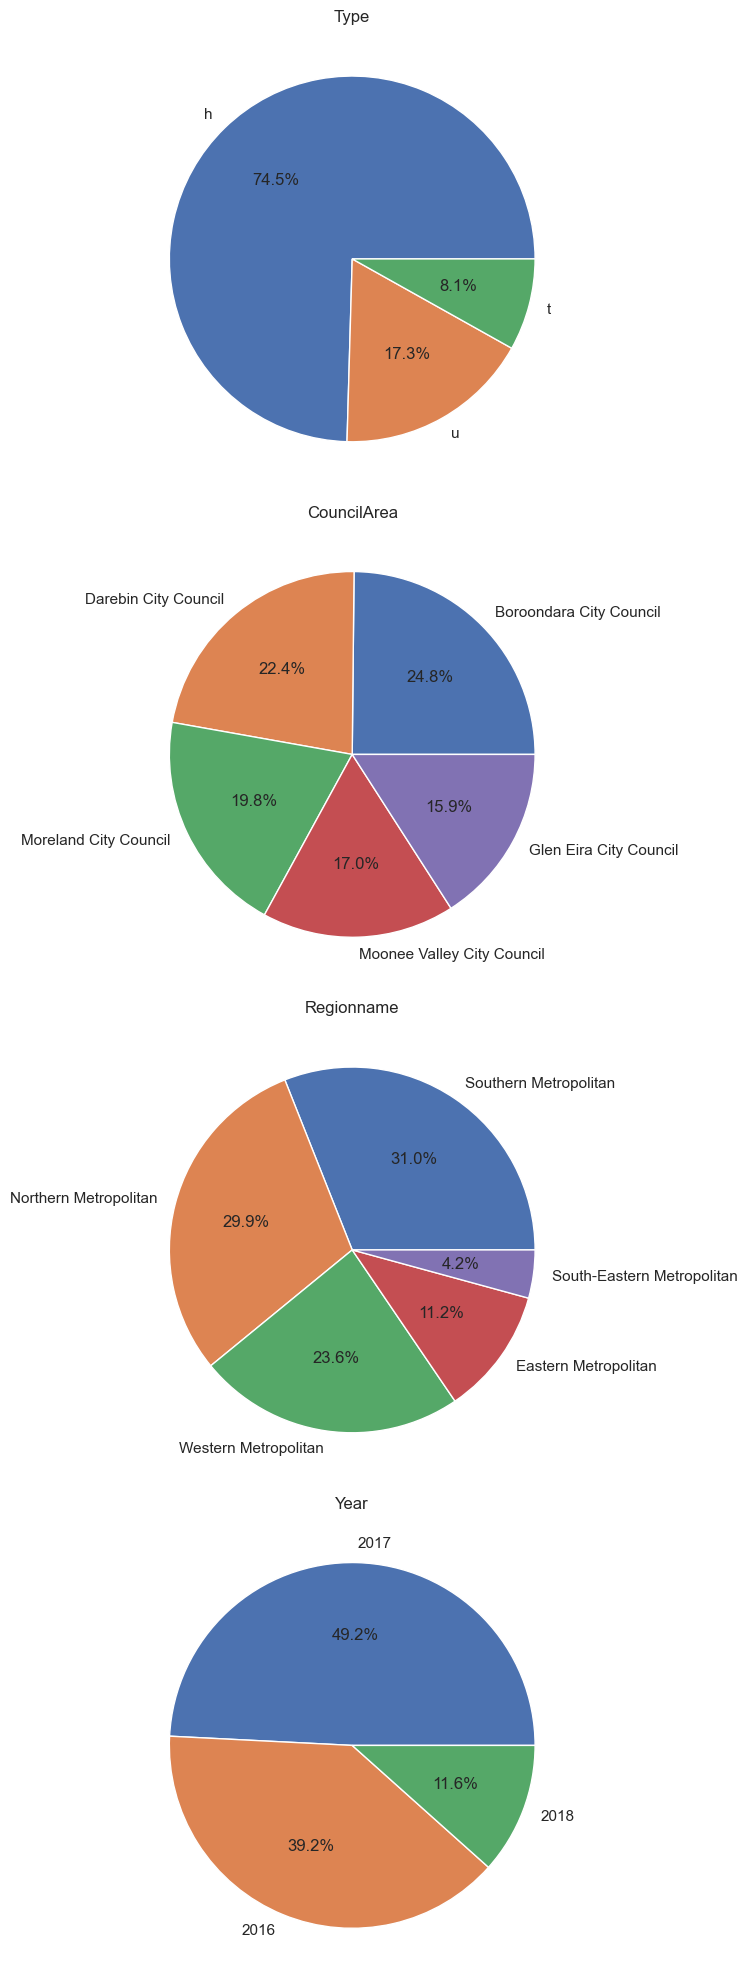

In [38]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Type', 'CouncilArea', 'Regionname', 'Year']

# Create a figure and axes
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    counts = df[var].value_counts()
    if len(counts) > max_categories:
        counts = counts[:max_categories]
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axs[i].set_title(var)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()



/var/folders/kr/dnn4yz45639_qpcw2723y4t80000gn/T/ipykernel_21472/1269771424.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='Type', data=df, ci=None, estimator='mean', alpha=0.8)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


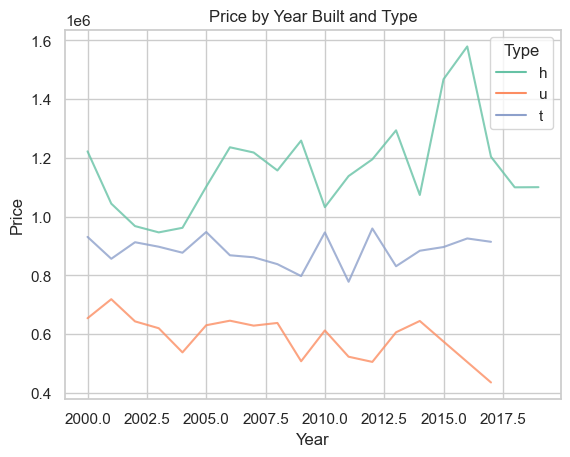

In [46]:
# Remove rows where 'YearBuilt' < 2000
df = df[df['YearBuilt'] >= 2000]

sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.lineplot(x='YearBuilt', y='Price', hue='Type', data=df, ci=None, estimator='mean', alpha=0.8)

plt.title("Price by Year Built and Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

/var/folders/kr/dnn4yz45639_qpcw2723y4t80000gn/T/ipykernel_21472/4144181907.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='CouncilArea', data=df, ci=None, estimator='mean', alpha=0.7)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


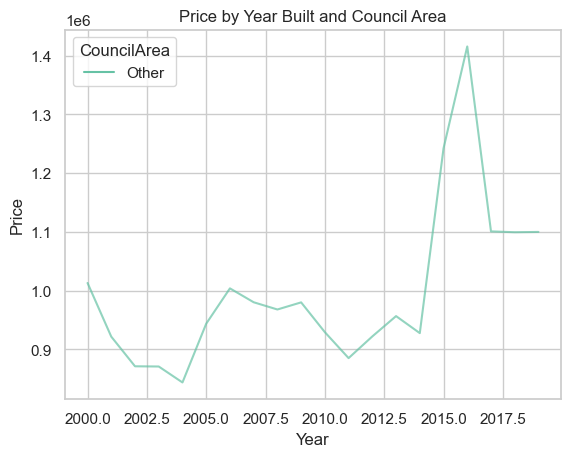

In [54]:

sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.lineplot(x='YearBuilt', y='Price', hue='CouncilArea', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Built and Council Area")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()